<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Rubén Hernández Guevara | Andrés Hernández Jiménez.

**Fecha:** 09 de Marzo del 2021.

**Expediente** : 717710 | 717895.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Rub27182n/Proyecto-SPF.git

# Proyecto TEMA-2

In [ ]:
# <font color='midnightblue'>

# <font color='midnightblue'> 1. Análisis y Simulación de Videos de Youtube

> En este proyecto, examinaremos a detalle y simularemos las variables más escenciales de un video de YouTube: Likes, Dislikes, Comments y Views para obtener los estadísticos más probables de un hipotético video.

# <font color='midnightblue'> 2 . Objetivos

> ###  <font color='midnightblue'> Generales
>> Consideramos como objetivo principal, el generar un modelo/función que permita simular, a partir de parámetros o características clave de un video de YouTube, sus principales estádisticos.
    
> ###  <font color='midnightblue'> Específicos
>> - Encontrar las categorías de video más populares y etiquetarlas.
>> - Obtener la Función de Distribución de Probabilidad de cada estadístico para las categorías más populares.
>> - Simular cantidad de Likes, Dislikes, Comments y Views para las categorías más populares.

# <font color='midnightblue'> 3.  Definición del Problema
    
> En este proyecto queremos plantear la idea de una compañía que opera con Data Science,  y que a través de una base de datos de videos de YouTube, le es posible obtener distribuciones de probabilidad y simular casos específicos de hipotéticos videos, a los cuales se pretende estimar su recibimiento (número de vistas, likes, dislikes y comentarios) en la plataforma. 
    
> Todos los datos que se utilizarán son datos reales de videos en Youtube México y YouTube Estados Unidos. Con los 4 estadísticos previamente mencionados, se podrá obtener la información necesaria para evaluar las diferentes categorías de videos y su recibimiento en la plataforma a través de simulación Monte Carlo. Estos parámetros serán los nodos para trabajar específicamente y a través de estos se generarán datos que nos permiten cumplir con el objetivo central, examinar a detalle y simular las variables escenciales de un video de YouTube. 

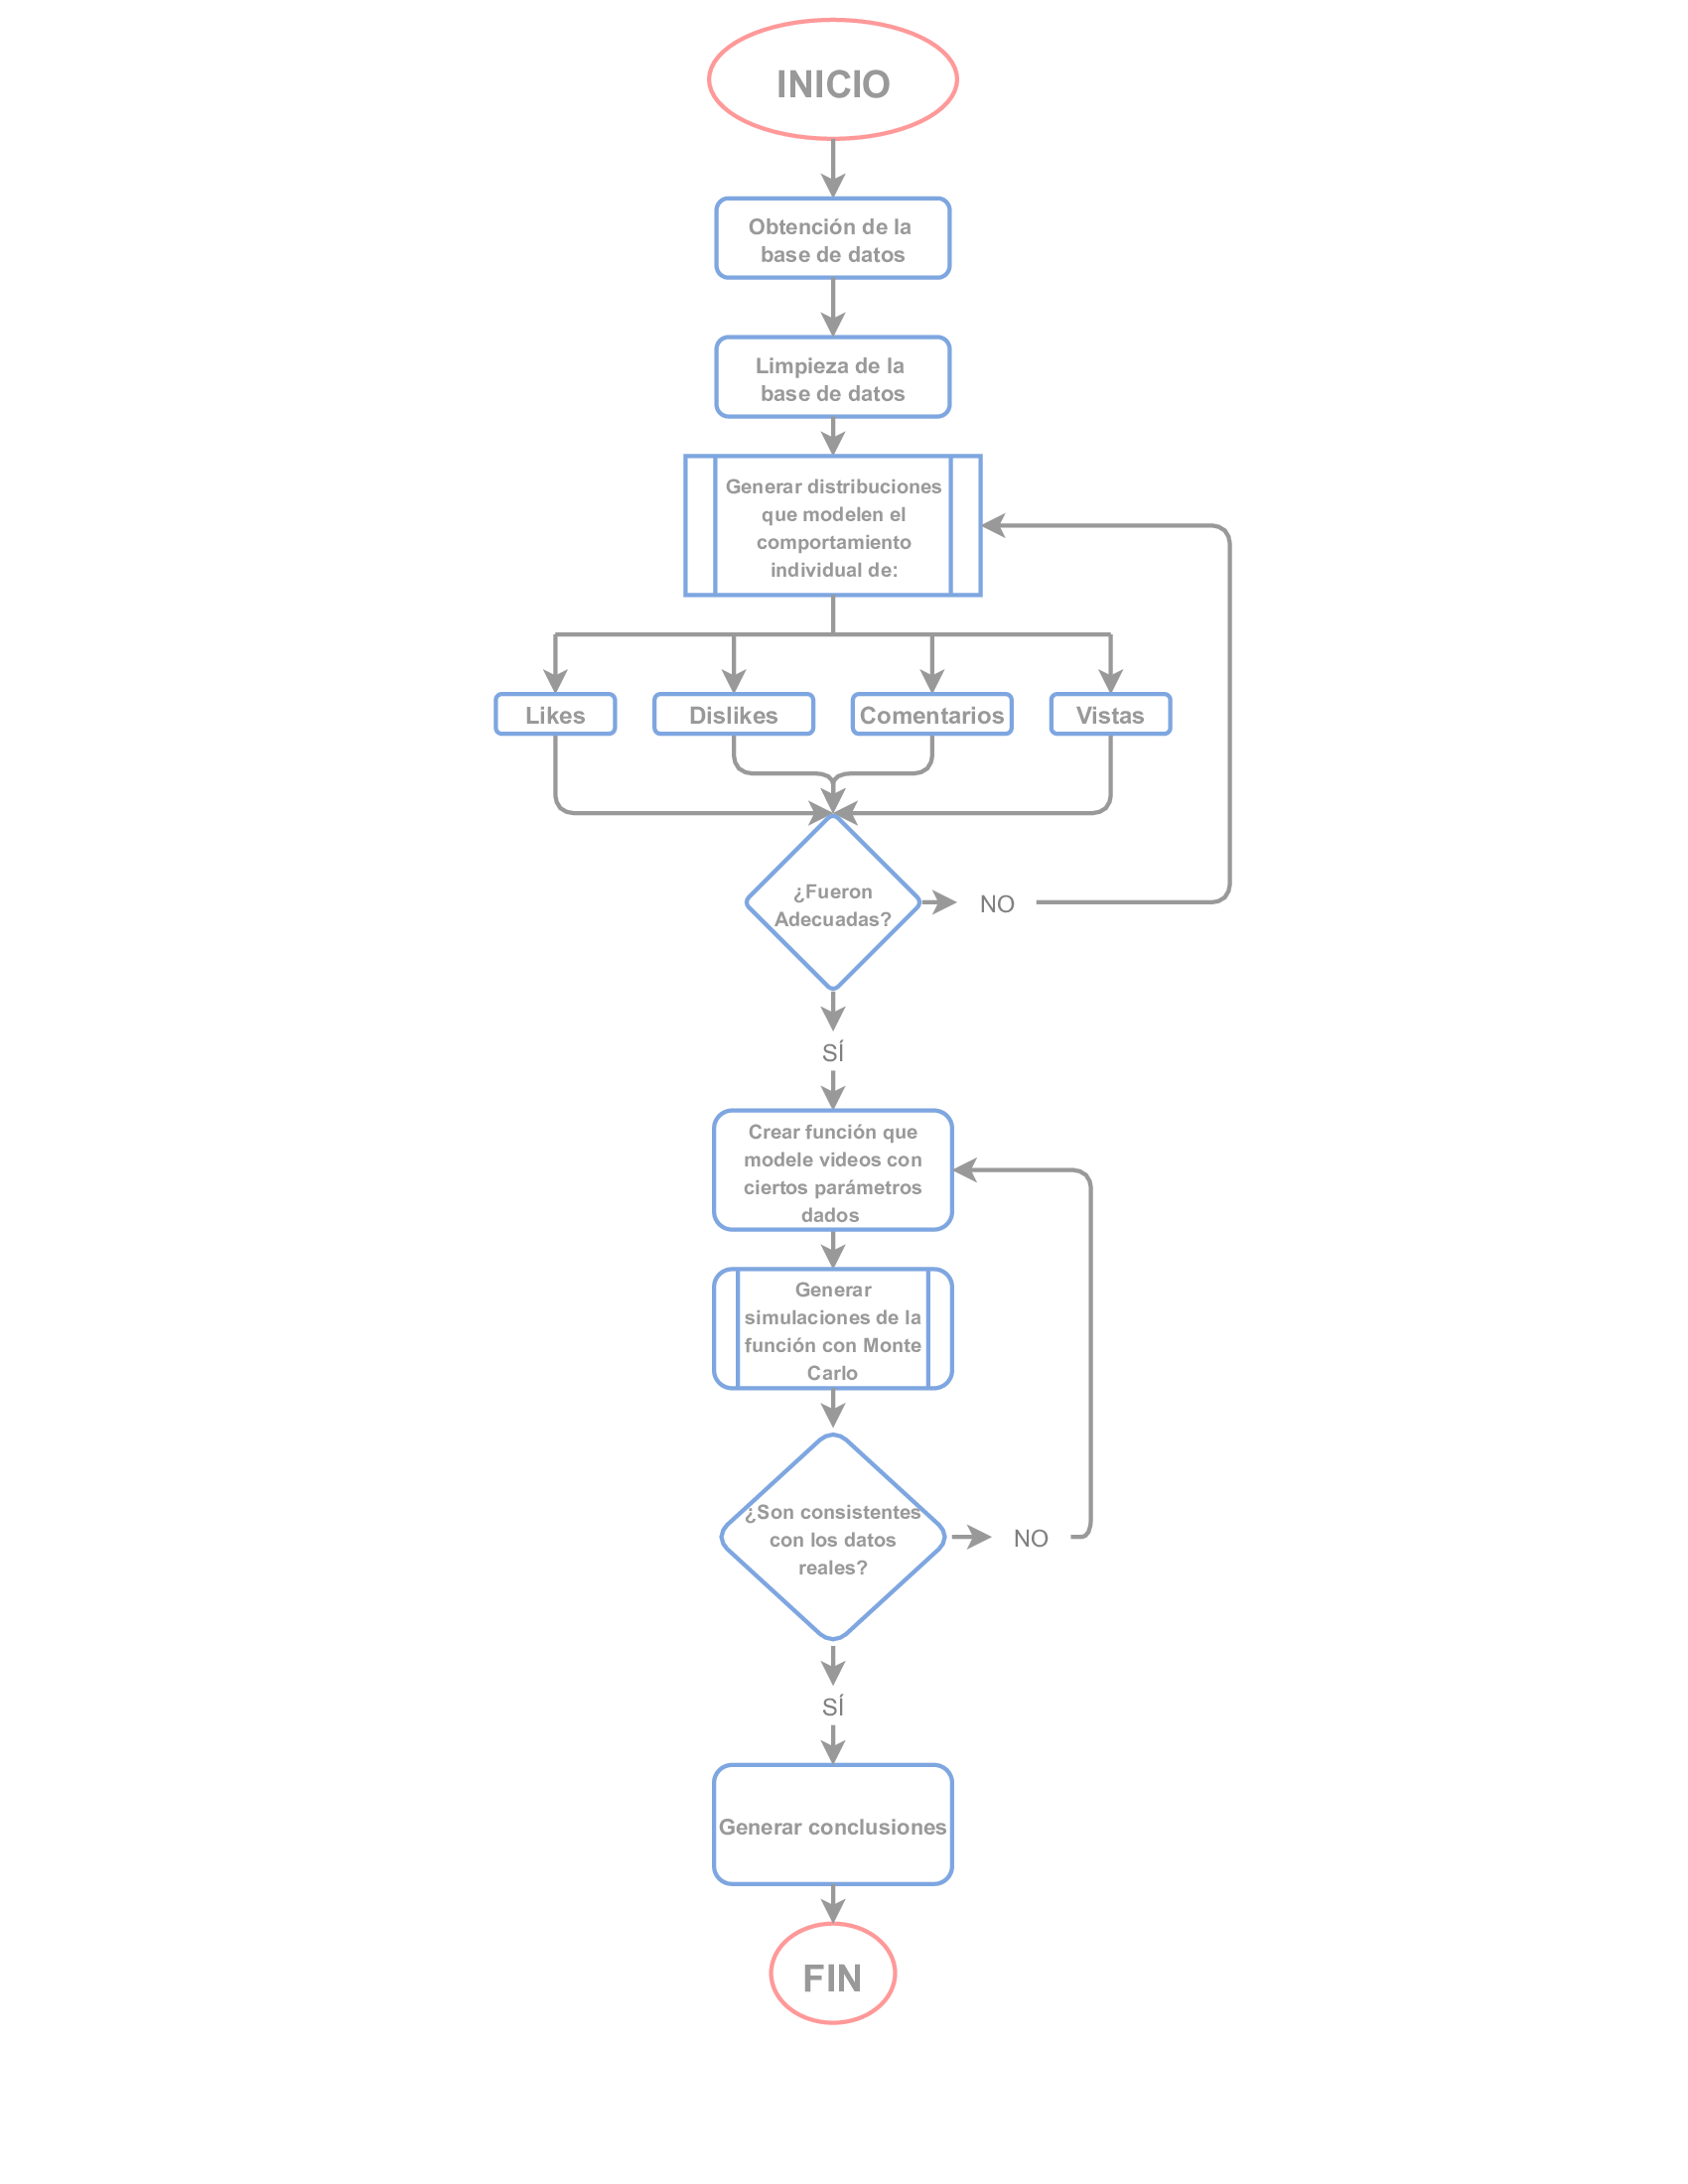

In [1]:
from IPython import display 
display.Image("./diagrama.png")

# <font color='midnightblue'> 4. Nodos/Variables a Simular

> Los nodos/variables que elegimos son:
> - Número de Vistas
> - Cantidad de Likes
> - Cantidad de Dislikes
> - Número de Comentarios
> - Categoría de Videos

> Estos nodos fueron elegidos porque generamos la hipótesis de que intrínsecamente están correlacioandos y además se pueden simular ante el supuesto de un video ingresado en la red y su desempeño en la plataforma. La categoría de video es un filtro fundamental para poder separar los resultados de acuerdo con lo que la gente quiere ver basándonos en su popularidad actual. La ratio entre likes y dislikes nos darán una muy buena idea de cómo se desempeña el video una vez en la plataforma. El número de vistas y sus respectivos comentarios afirmarán si este video está volviéndose popular.

# <font color='midnightblue'> 5. Definición de Hipótesis y Supuestos

> ###  <font color='midnightblue'> Hipótesis
>> Con base en los datos reales, nuestra primera **Hipótesis** es que la categoría de video no tiene inferencia en los estadísticos/resultados del video. 
    
>> La segunda, es que existe una cierta dependencia entre los nodos o variables que decidimos analizar, por lo que gracias a esto es posible obtener aproximados de unos a partir de otros.
    
> ###  <font color='midnightblue'> Supuestos
>> - El número de suscriptores no influye en los resultados del video.
>> - Los resultados de los videos no han sido modificados con algún tipo de bot/publicidad.
>> - Se tomará las 3 categorías con mayor frecuencia como las más populares.
    

# <font color='midnightblue'>6. Obtención y Limpieza de la Base de Datos

> Las bases de datos se obtuvieron directamente del sitio Kaggle, son dos archivos .csv que contienen información sobre videos de YouTube México y YouTube Estados Unidos, esta información es representada en las siguientes categorías: 
- Número de Vistas
- Número de Comentarios
- Número de Likes
- Número de Dislikes
- Categoría de Video

> Enlace al dataset: [YouTube Video Statistics](https://www.kaggle.com/datasnaek/youtube-new)

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import scipy.stats as st
import matplotlib.pyplot as plt
from time import time
from collections import Counter
from CDIN import CDIN as eda
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
import warnings
warnings.filterwarnings("ignore") 
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
mx = pd.read_csv('MXvideos.csv')
mx.shape

(40451, 16)

In [4]:
# ----------------------- Eliminar Columnas -----------------------
mx.drop(['trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description'], inplace=True, axis=1)

In [5]:
# ----------------------- Aplicar EDA (Exporatory Data Analysis) -----------------------
eda.dqr(mx)

,Nombre,data_types,missing_values,present_values,unique_values,min,max
video_id,video_id,object,0,40451,33513,#NAME?,zzxLG6R5cHI
category_id,category_id,int64,0,40451,16,1,43
views,views,int64,0,40451,35915,157,100912384
likes,likes,int64,0,40451,14564,0,4470923
dislikes,dislikes,int64,0,40451,3693,0,1353667
comment_count,comment_count,int64,0,40451,6310,0,905925


In [6]:
# ----------------------- Mostrar Duplicados de 'video_id' -----------------------
print(mx[mx.duplicated(subset = ['video_id'])]) #mx[~] para mostrar opuesto

          video_id  category_id    views   likes  dislikes  comment_count
70          #NAME?           22    57070    6158       118            518
86          #NAME?           22     9409      24         2              3
219    _OXDcGPVAa4           26  1746221   93269      1792          10285
233    hcY52MFWMDM           25   263352     846       393            452
258         #NAME?           17   478507    1508       133            523
...            ...          ...      ...     ...       ...            ...
40419       #NAME?           24    13385     166         8             18
40420  WGOi_1XBclQ           10  4233617  436609     11240          56709
40426  TXTIMp7En-Q           25    78139    3118      1226           1896
40429  L6JFnZ5WabM           24   141734    5012       207           1294
40447  i7r_kMbyngk           25   121674    3558        58            491

[6938 rows x 6 columns]


In [7]:
# ----------------------- Crear df sin 'video_id' repetidos -----------------------
df = mx[~mx.duplicated(subset = ['video_id'])]

In [8]:
# ----------------------- Comprobar -----------------------
(df['video_id'].unique()).shape

(33513,)

In [9]:
# ----------------------- Comprobar -----------------------
Counter(df["video_id"].duplicated())

Counter({False: 33513})

In [10]:
# ----------------------- Eliminar Columnas con Valores = 0 -----------------------
index_names = df[(df['likes'] == 0) | (df['dislikes'] == 0 ) | (df['comment_count'] == 0 )].index

In [11]:
index_names

Int64Index([    7,    32,    88,    89,   120,   139,   146,   157,   184,
              188,
            ...
            40053, 40075, 40131, 40136, 40160, 40193, 40361, 40399, 40428,
            40433],
           dtype='int64', length=1548)

In [12]:
Counter(df['dislikes'] == 0)

Counter({False: 32621, True: 892})

In [13]:
# ----------------------- Eliminarlos -----------------------
df.drop(index_names, inplace = True)

In [14]:
# ----------------------- Tamaño Final del Dataset -----------------------
df.shape

(31965, 6)

In [15]:
Counter(df['likes'] == 0)

Counter({False: 31965})

In [16]:
# ----------------------- Aplicar ln a las Columnas -----------------------
df['views'] = np.log(df['views'])
df['likes'] = np.log(df['likes'])
df['dislikes'] = np.log(df['dislikes'])
df['comment_count'] = np.log(df['comment_count'])

In [ ]:
# ----------------------- Aplicar exp a las Columnas (Valor Real) -----------------------

# df['views'] = np.exp(df['views']) #.astype(int)
# df['likes'] = np.exp(df['likes']) 
# df['dislikes'] = np.exp(df['dislikes'])
# df['comment_count'] = np.exp(df['comment_count'])
# df.head()

In [ ]:
# plt.figure(figsize=(16,8))
# plt.style.use('seaborn-pastel')

# plt.subplot(2,2,1)
# plt.hist(df['views'], bins = 30)
# plt.title('Views')

# plt.subplot(2,2,2)
# plt.hist(df['comment_count'], bins = 30)
# plt.title('Comments')

# plt.subplot(2,2,3)
# plt.hist(df['likes'], bins = 30)
# plt.title('Likes')

# plt.subplot(2,2,4)
# plt.hist(df['dislikes'], bins = 30)
# plt.title('Dislikes');

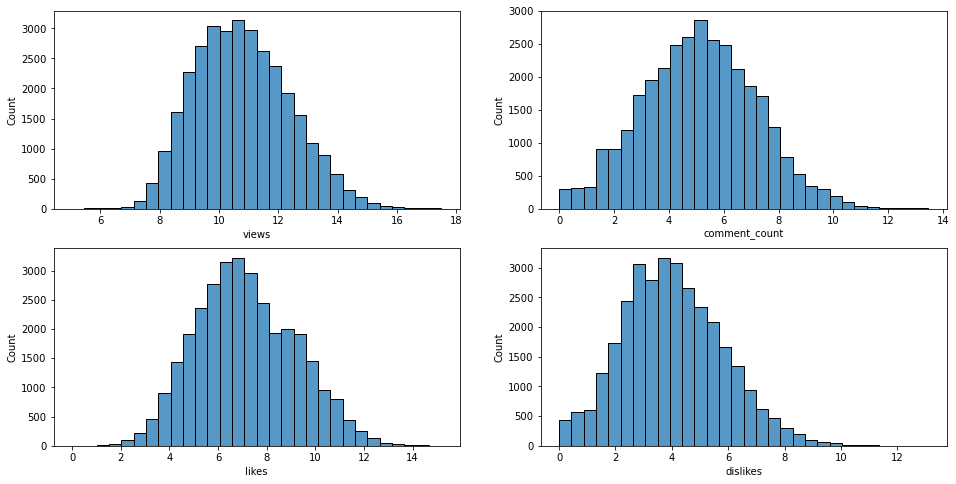

In [17]:
# ----------------------- Ver Forma Real de los Datos -----------------------
fig, ax = plt.subplots(2, 2, figsize=(16,8))

sns.histplot(df['views'], ax=ax[0,0], bins = 30)
sns.histplot(df['comment_count'], ax=ax[0,1], bins = 30)
sns.histplot(df['likes'], ax=ax[1,0], bins = 30)
sns.histplot(df['dislikes'], ax=ax[1,1], bins = 30);

# <font color='midnightblue'> Simulación nodo 1: Views

# <font color='midnightblue'> Simulación nodo 2: Likes

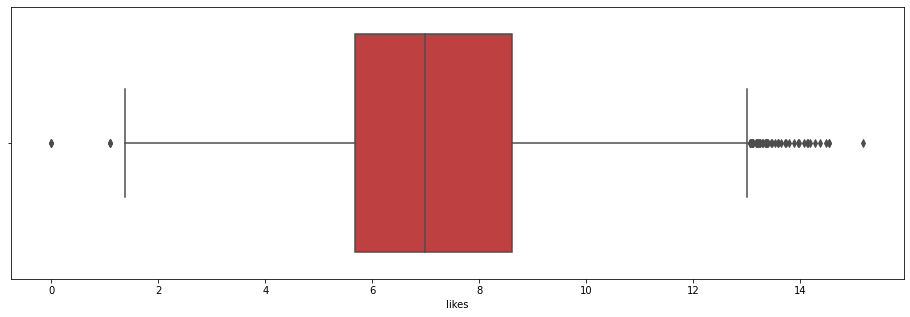

In [18]:
fig, ax1 = plt.subplots(figsize=(16, 5))
sns.boxplot(x=df['likes'], ax = ax1, saturation=.5, color='r', fliersize=5);

In [19]:
# -------------------- Distribuciones Seleccionadas Específicamente Para Este Nodo --------------------
dist_list = ['beta', 'burr12', 'chi', 'chi2', 'exponweib', 'gengamma', 'logistic', 'nakagami', 'nct', 'norm', 'pearson3']

In [ ]:
# dist_continu = [d for d in dir(st) if isinstance(getattr(st, d), st.rv_continuous)]
# dist_discrete = [d for d in dir(st) if isinstance(getattr(st, d), st.rv_discrete)]

In [20]:
# -------------------- Función Para Obtener Histograma Junto con Distribuciones y su Respectivo Error --------------------
def distribuciones(dist_list, data, bins):
    
        
    plt.figure(figsize = (16, 8))
    global err, x, y, J    
    J = bins
    
    err = pd.DataFrame(index = dist_list, columns = ['error'])
    
    y, x,  _ = plt.hist(data, bins = bins, density = True)    
    x = x[1:]  #Para tener mismo shape en x, y
    
    def ajuste_dist(dist):
        global params
        params = getattr(st, dist).fit(data)
        y_hat = getattr(st, dist).pdf(x, *params)
        err.loc[dist] = ((y - y_hat)**2).mean()
        plt.plot(x, y_hat, label = dist);
    
    [ajuste_dist(dist) for dist in dist_list]
    
    
    plt.legend()
    plt.show()

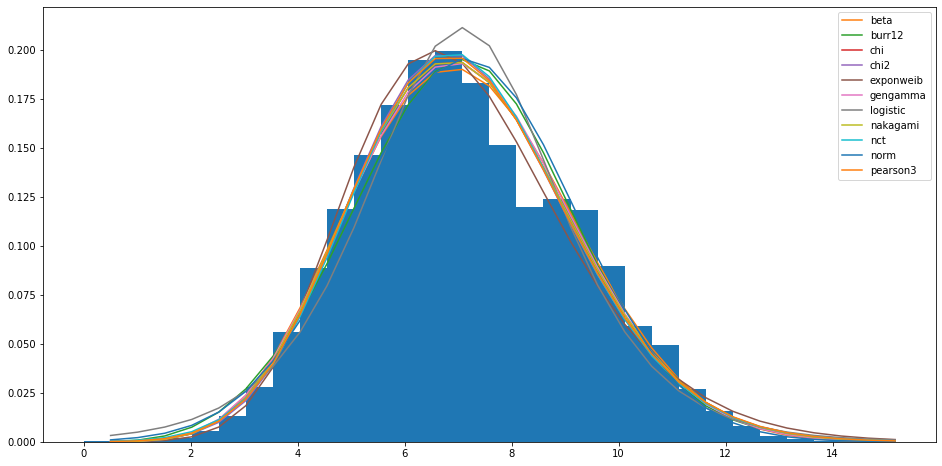

In [21]:
distribuciones(dist_list, df['likes'], 30)

In [22]:
# -------------------- Top 5 Distribuciones Para 'Likes' --------------------
err.sort_values(by = 'error').head(5)

,error
beta,0.000112518
chi,0.000122472
nakagami,0.000122473
gengamma,0.000123077
pearson3,0.000128598


In [23]:
best = err.sort_values(by = 'error').head(5).index.values

### <font color='midnightblue'> Prueba Q-Q Para la Distribución Beta

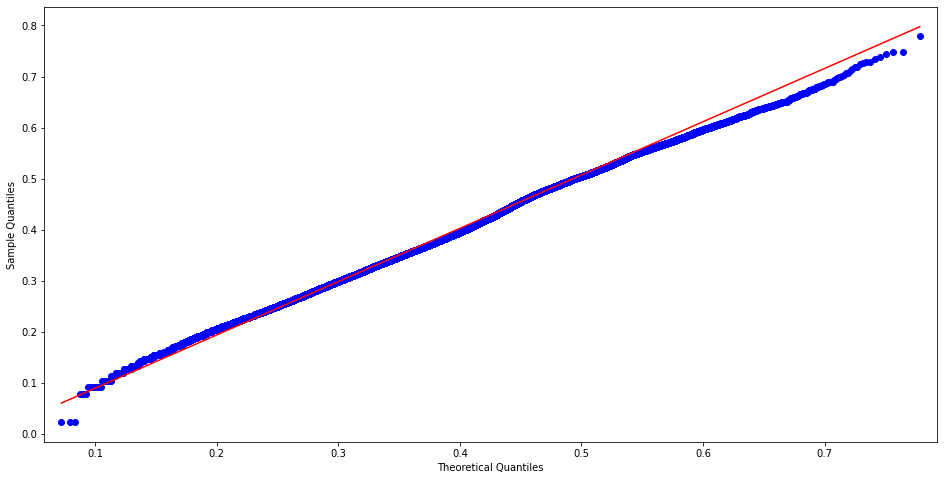

In [24]:
dist = best
fig, ax = plt.subplots(1,1, figsize = [16, 8])
g1 = sm.qqplot(df['likes'], dist = getattr(st, best[0]), line = 'q', fit = True, ax = ax)

> La mayor (no tan grande) incongruencia en la prueba Q-Q está en la cola derecha, visible también en el diagrama de caja.

### <font color='midnightblue'> Prueba de la Chi Cuadrada $\chi^2$ Para la Distribución Beta

In [30]:
mu = x.mean()
mu

7.8385567139748025

In [31]:
sigma = x.std()
sigma

4.37717217275905

In [37]:
params

(0.30326779906003287, 7.1406854508576005, 2.0430241760121692)

In [28]:
J

30

In [40]:
param = getattr(st, 'beta').fit(x)

In [41]:
param

(1.0244740963087584,
 0.9303810540744013,
 0.29840077304387647,
 14.872999318520263)

In [44]:
pi = st.beta.pdf(x, *param)
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi
J = 30
# Cálculo usando la librería estadística de la chi cuadrada
Xs = st.chisquare(y, Ei)
print('Valor de chi cuadrado librería: ', Xs)

# Cálculo de Grados de libertad del estadístico
p = 3 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est2 = st.chi2.ppf(q = 0.90, df = m)
print('Estadístico de chi_cuadrado = ', Chi_est2)
print('Media muestral: %f \nDesviación estándar muestral: %f '%(mu, sigma))
print('Media real: %f \nDesviación real muestral: %f'%(df['likes'].mean(), df['likes'].std()))

Valor de chi cuadrado librería:  Power_divergenceResult(statistic=24.487759355991663, pvalue=0.7045336122326327)
Estadístico de chi_cuadrado =  35.563171271923466
Media muestral: 7.838557 
Desviación estándar muestral: 4.377172 
Media real: 7.140719 
Desviación real muestral: 2.039275


In [34]:
x.shape, pi.shape, Ei.shape, p, m

((30,), (30,), (30,), 3, 26)

### <font color='midnightblue'> Estimación de función para MDAR con KDE

In [ ]:
x_grid = np.linspace(min(df['likes']), max(df['likes']), 1000)
nodo2 = np.random.choice(df['likes'], 5000)

grid = GridSearchCV(KernelDensity(),
                    {'bandwidth': np.linspace(0.1, 1.0, 30)},
                    cv = 30) # 20-fold cross-validation
grid.fit(nodo2[:, None])
print(grid.best_params_)

kde = grid.best_estimator_
pdf = np.exp(kde.score_samples(x_grid[:, None]))

fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(x_grid, pdf, linewidth = 3, alpha = 0.5, label='bw=%.2f' % kde.bandwidth)
ax.hist(nodo2, 30, fc = 'gray', histtype = 'stepfilled', alpha = 0.3, density = True)
ax.legend(loc = 'upper right')
ax.set_xlim(min(df['likes']), max(df['likes']));

# <font color='midnightblue'> ANEXOS

In [ ]:
# ----------------------- Imagen de Distribuciones Continuas -----------------------
from IPython import display 
display.Image("./Distribuciones.png")